### Installing and importing the packages

In [ ]:
!pip install alibi

  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:
      Successfully uninstalled numpy-1.19.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.9 requires numpy==1.19.1, but you have numpy 1.19.5 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.0.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install lazypredict

  Using cached numpy-1.19.1-cp37-cp37m-manylinux2010_x86_64.whl (14.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.19.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.0.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install eli5

In [ ]:
!pip install pyforest

In [ ]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc
from xgboost import XGBClassifier, plot_importance
import warnings
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

### Understanding the data

In [ ]:
data = pd.read_csv('/content/diabetes.csv')
data.head(5)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1,50,4.70,46,4.90,4.20,0.90,2.40,1.40,0.50,24.00,0
1,0,26,4.50,62,4.90,3.70,1.40,1.10,2.10,0.60,23.00,0
2,1,50,4.70,46,4.90,4.20,0.90,2.40,1.40,0.50,24.00,0
3,1,50,4.70,46,4.90,4.20,0.90,2.40,1.40,0.50,24.00,0
4,0,33,7.10,46,4.90,4.90,1.00,0.80,2.00,0.40,21.00,0


In [ ]:
data.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,0.43,53.53,5.12,68.94,8.28,4.86,2.35,1.20,2.61,1.85,29.58,0.95
std,0.50,8.80,2.94,59.98,2.53,1.30,1.40,0.66,1.12,3.66,4.96,0.39
min,0.00,20.00,0.50,6.00,0.90,0.00,0.30,0.20,0.30,0.10,19.00,0.00
25%,0.00,51.00,3.70,48.00,6.50,4.00,1.50,0.90,1.80,0.70,26.00,1.00
50%,0.00,55.00,4.60,60.00,8.00,4.80,2.00,1.10,2.50,0.90,30.00,1.00
75%,1.00,59.00,5.70,73.00,10.20,5.60,2.90,1.30,3.30,1.50,33.00,1.00
max,1.00,79.00,38.90,800.00,16.00,10.30,13.80,9.90,9.90,35.00,47.75,2.00


In [ ]:
data.shape

(1000, 12)

In [ ]:
diab = data.copy()

In [ ]:
target = 'CLASS'
features_list = list(diab.columns)
features_list.remove(target)

### Histogram

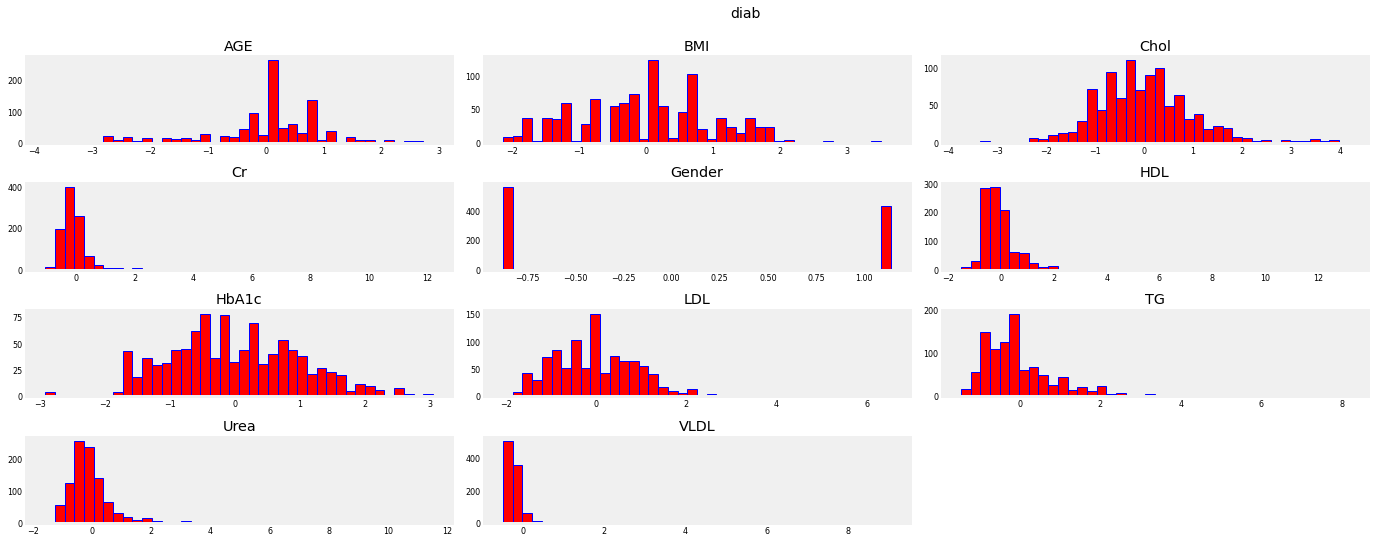

In [ ]:
diab[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('diab', x=0.65, y=1.25, fontsize=14);

### Correlation heatmap

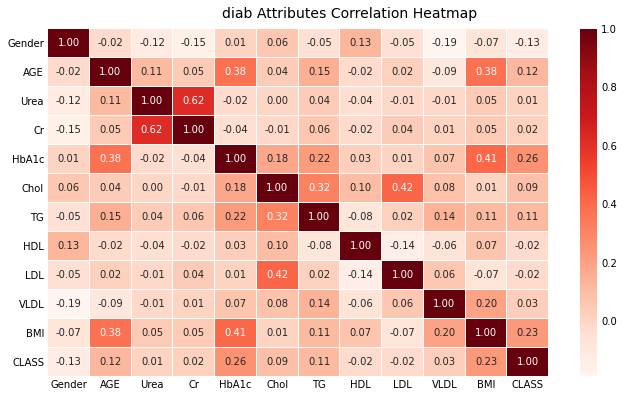

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
corr = diab.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Reds",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('diab Attributes Correlation Heatmap', fontsize=14)

### Using LazyPredict for model selection


In [ ]:
y = diab.pop('CLASS')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diab, y, test_size=0.2, random_state=33)
X_train.shape, X_test.shape

((800, 11), (200, 11))

In [ ]:
import pyforest
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 16.79it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.99,1.00,None,0.99,0.05
AdaBoostClassifier,0.94,0.98,None,0.95,0.16
XGBClassifier,0.98,0.98,None,0.99,0.11
LGBMClassifier,0.98,0.98,None,0.99,0.20
DecisionTreeClassifier,0.98,0.95,None,0.98,0.02
RandomForestClassifier,0.98,0.94,None,0.98,0.21
GaussianNB,0.93,0.90,None,0.93,0.02
ExtraTreesClassifier,0.97,0.90,None,0.97,0.17
QuadraticDiscriminantAnalysis,0.92,0.84,None,0.92,0.02


### XGB

In [ ]:
%%time
xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb.fit(X_train, y_train)

CPU times: user 106 ms, sys: 1.56 ms, total: 107 ms
Wall time: 111 ms


In [ ]:
xgb_predictions = xgb.predict(X_test)

In [ ]:
def evaluation_scores(test, prediction, target_names=None):
    print('Accuracy:', np.round(metrics.accuracy_score(test, prediction), 4)) 
    print('-'*60)
    print('classification report:\n\n', metrics.classification_report(y_true=test, y_pred=prediction, target_names=target_names)) 
    
    classes = [0, 1]
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

In [ ]:
evaluation_scores(y_test, xgb_predictions, target_names=['Diabetic', 'Non-Diabetic', 'Predict-Diabetic'])

Accuracy: 0.985
------------------------------------------------------------
classification report:

                   precision    recall  f1-score   support

        Diabetic       0.88      0.94      0.91        16
    Non-Diabetic       0.99      0.99      0.99       175
Predict-Diabetic       1.00      1.00      1.00         9

        accuracy                           0.98       200
       macro avg       0.96      0.98      0.97       200
    weighted avg       0.99      0.98      0.99       200



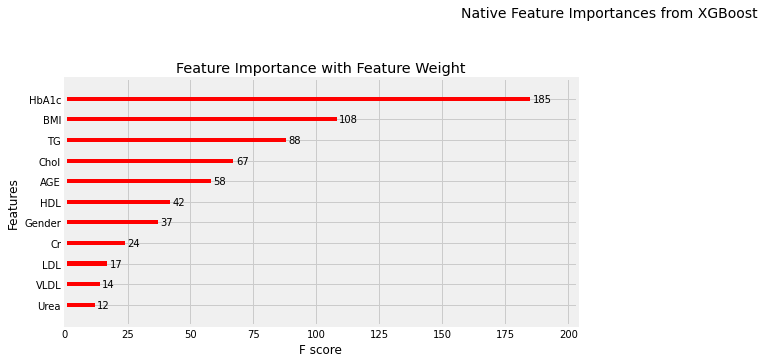

In [ ]:
# ploting XGBoost default feature importances
fig = plt.figure(figsize = (18, 10))
title = fig.suptitle("Native Feature Importances from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2, 2, 1)
plot_importance(xgb, importance_type='weight', ax=ax1, color='red')
ax1.set_title("Feature Importance with Feature Weight");

### Feature Importance

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
eli5.show_weights(xgb.get_booster(), top=30)

Weight,Feature
0.3705,HbA1c
0.2620,BMI
0.1368,AGE
0.1125,Chol
0.0431,TG
0.0310,HDL
0.0157,LDL
0.0126,Gender
0.0094,Cr
0.0046,Urea


In [ ]:
tgt = 4
print('Reference:', y_test.iloc[tgt])
print('Predicted:', xgb_predictions[tgt])
eli5.show_prediction(xgb.get_booster(), X_test.iloc[tgt], 
                     feature_names=list(diab.columns), show_feature_values=True)

Reference: 1
Predicted: 1


In [ ]:
tgt = 1
print('Reference:', y_test.iloc[tgt])
print('Predicted:', xgb_predictions[tgt])
eli5.show_prediction(xgb.get_booster(), X_test.iloc[tgt], 
                     feature_names=list(diab.columns), show_feature_values=True)

Reference: 1
Predicted: 1


In [ ]:
%%time
xgb_array = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb_model=xgb_array.fit(X_train.values, y_train)

CPU times: user 104 ms, sys: 1.66 ms, total: 106 ms
Wall time: 108 ms


In [ ]:
model = DecisionTreeClassifier(random_state=1)
model = model.fit(X_train, y_train)

Permutation Importance

In [ ]:
permutation = PermutationImportance(model, random_state=21).fit(X_train, y_train)

In [ ]:
eli5.show_weights(permutation, feature_names = features_list, top=30)

Weight,Feature
0.1750 ± 0.0147,HbA1c
0.1370 ± 0.0083,BMI
0.0365 ± 0.0053,Chol
0.0185 ± 0.0051,AGE
0.0130 ± 0.0077,TG
0.0097 ± 0.0040,HDL
0.0012 ± 0.0000,LDL
0.0010 ± 0.0010,Urea
0 ± 0.0000,VLDL
0 ± 0.0000,Cr


### **Anchors**




In [ ]:
from alibi.explainers import AnchorTabular
predict_func=lambda x:xgb_model.predict_proba(x)
explainer=AnchorTabular(predict_func,features_list)

In [ ]:
xgb_model.predict_proba(X_test.values)

array([[7.41364202e-05, 9.99810994e-01, 1.14842907e-04],
       [4.84276279e-05, 9.99808371e-01, 1.43211000e-04],
       [1.04824918e-04, 9.99672413e-01, 2.22780349e-04],
       [9.98753905e-01, 6.54711155e-04, 5.91428077e-04],
       [7.73088395e-05, 9.99790847e-01, 1.31876252e-04],
       [1.93564617e-03, 1.23897009e-03, 9.96825457e-01],
       [3.72420145e-05, 9.99800146e-01, 1.62596014e-04],
       [9.17927100e-05, 9.99779642e-01, 1.28539861e-04],
       [4.97616304e-04, 9.94599819e-01, 4.90251323e-03],
       [9.63850835e-05, 9.99824464e-01, 7.91338025e-05],
       [1.42041798e-04, 9.99663472e-01, 1.94479260e-04],
       [1.08094042e-04, 9.99742806e-01, 1.49066676e-04],
       [1.09940382e-04, 9.99740303e-01, 1.49808518e-04],
       [1.57711806e-03, 9.98095334e-01, 3.27519141e-04],
       [2.69974396e-03, 9.94033754e-01, 3.26655805e-03],
       [6.78059077e-05, 9.99760091e-01, 1.72091881e-04],
       [3.24815119e-05, 9.99843001e-01, 1.24444196e-04],
       [1.68741462e-04, 9.99621

In [ ]:
x_train=X_train.to_numpy()
x_test=X_test.to_numpy()

In [ ]:
explainer.fit(x_train)

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'disc_perc': (25, 50, 75), 'seed': None}}
)

In [ ]:
inst=17
target_label=['diabetic','Non diabetic','predicted Diabetic']
print('Person is',target_label[explainer.predictor(x_test[inst].reshape(1, -1))[0]])
anchor=explainer.explain(x_test[inst])
print('Anchor generated feature(/s)',anchor.anchor)

Person is Non diabetic
Anchor generated feature(/s) ['HbA1c > 6.50']


### **Counterfactuals**

In [ ]:
import tensorflow as tf
tf.get_logger().setLevel(40) # suppress deprecation messages
tf.compat.v1.disable_v2_behavior() # disable TF2 behaviour as alibi code still relies on TF1 constructs
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head(5)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1,50,4.70,46,4.90,4.20,0.90,2.40,1.40,0.50,24.00,0
1,0,26,4.50,62,4.90,3.70,1.40,1.10,2.10,0.60,23.00,0
2,1,50,4.70,46,4.90,4.20,0.90,2.40,1.40,0.50,24.00,0
3,1,50,4.70,46,4.90,4.20,0.90,2.40,1.40,0.50,24.00,0
4,0,33,7.10,46,4.90,4.90,1.00,0.80,2.00,0.40,21.00,0


In [ ]:
target = 'CLASS'
features_list = list(diab.columns)
# features_list.remove(target)

In [ ]:
data = df[features_list]
target = df[target]

In [ ]:
mu = data.mean(axis=0)
sigma = data.std(axis=0)
data = (data - mu) / sigma

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=0)
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [ ]:
x_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
253,-0.88,0.17,-0.33,-0.08,-0.07,-0.28,-0.61,-0.01,0.08,2.33,0.37
667,1.14,0.85,-0.89,-0.40,1.31,3.72,8.17,-0.31,0.44,1.21,0.69
85,-0.88,-0.40,0.23,-0.13,-1.69,-2.20,-0.82,0.14,0.35,-0.29,-1.73
969,-0.88,-0.40,1.32,1.35,-0.62,0.41,2.11,-0.76,0.08,-0.18,-1.73
75,-0.88,0.62,-0.14,-0.18,-1.65,1.10,-1.25,-0.16,2.05,-0.21,-1.12
...,...,...,...,...,...,...,...,...,...,...,...
835,-0.88,0.17,0.67,0.05,1.55,1.56,1.53,0.14,-1.08,-0.23,-0.72
192,-0.88,-2.33,-0.62,0.12,0.56,-1.89,-0.32,-0.61,-0.10,3.07,-1.69
629,-0.88,0.39,-0.35,-0.10,0.56,-0.97,1.96,-0.46,-0.10,-0.26,0.09
559,-0.88,0.17,-0.86,-0.35,1.39,0.18,-0.82,-0.31,0.89,-0.07,1.29


In [ ]:
y_test

993    1
859    1
298    1
553    1
672    1
      ..
462    1
356    1
2      0
478    1
695    1
Name: CLASS, Length: 250, dtype: int64

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
def nn_model():
    x_in = Input(shape=(11,))
    x = Dense(40, activation='relu')(x_in)
    x = Dense(40, activation='relu')(x)
    x_out = Dense(3, activation='softmax')(x)
    nn = Model(inputs=x_in, outputs=x_out)
    nn.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return nn

In [ ]:
y_train

253    1
667    1
85     0
969    1
75     0
      ..
835    1
192    1
629    1
559    1
684    1
Name: CLASS, Length: 750, dtype: int64

In [ ]:
nn = nn_model()
nn.summary()
nn.fit(x_train, y_train, batch_size=64, epochs=500, verbose=0)
nn.save('nn_heart.h5', save_format='h5')

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 11)]              0         
_________________________________________________________________
dense_30 (Dense)             (None, 40)                480       
_________________________________________________________________
dense_31 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 123       
Total params: 2,243
Trainable params: 2,243
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn = load_model('nn_heart.h5')
score = nn.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: ', score[1])

Test accuracy:  0.956


In [ ]:
x_test=x_test.to_numpy()
x_train=x_train.to_numpy()

In [ ]:
X = x_test[2].reshape((1,) + x_test[3].shape)
shape = X.shape

In [ ]:
from alibi.explainers import CounterFactualProto

nn = load_model('nn_heart.h5')

cf = CounterFactualProto(nn, shape, use_kdtree=True, theta=10., max_iterations=1000,
                         feature_range=(x_train.min(axis=0), x_train.max(axis=0)),
                         c_init=1., c_steps=10)

cf.fit(x_train)
explanation = cf.explain(X)

No encoder specified. Using k-d trees to represent class prototypes.


In [ ]:
sigma=sigma.to_numpy()
mu=mu.to_numpy()

In [ ]:
print('Original prediction: {}'.format(explanation.orig_class))
print('Counterfactual prediction: {}'.format(explanation.cf['class']))

orig = X * sigma + mu
counterfactual = explanation.cf['X'] * sigma + mu
delta = counterfactual - orig
for i, f in enumerate(features_list):
    if np.abs(delta[0][i]) > 1e-4 and (f!='AGE' and f!='GENDER'):
      # print('{}: {}'.format(f, delta[0][i]))
      print("Change",f,"from",orig[0][i],"to",counterfactual[0][i])

Original prediction: 1
Counterfactual prediction: 0
Change HbA1c from 6.8 to 5.250233436169516
Change TG from 2.5 to 2.2413257497111942
Change BMI from 32.0 to 25.38997659853263


### **ALE**

In [ ]:
y = diab.pop('CLASS')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diab.values, y.values, test_size=0.25, random_state=42)

In [ ]:
lr_ale = ALE(xgb_model.predict, feature_names=features_list, target_names=['CLASS'])
# rf_ale = ALE(rf.predict, feature_names=feature_names, target_names=['CLASS'])

In [ ]:
lr_exp = lr_ale.explain(X_train)

In [ ]:
from alibi.explainers import ALE, plot_ale

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba918ab790>,
        None]], dtype=object)

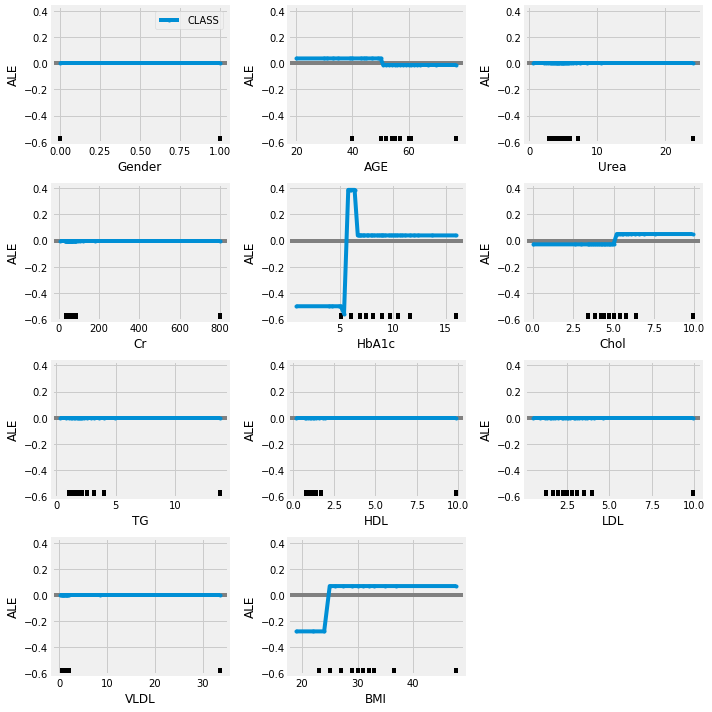

In [ ]:
plot_ale(lr_exp, fig_kw={'figwidth':10, 'figheight': 10})